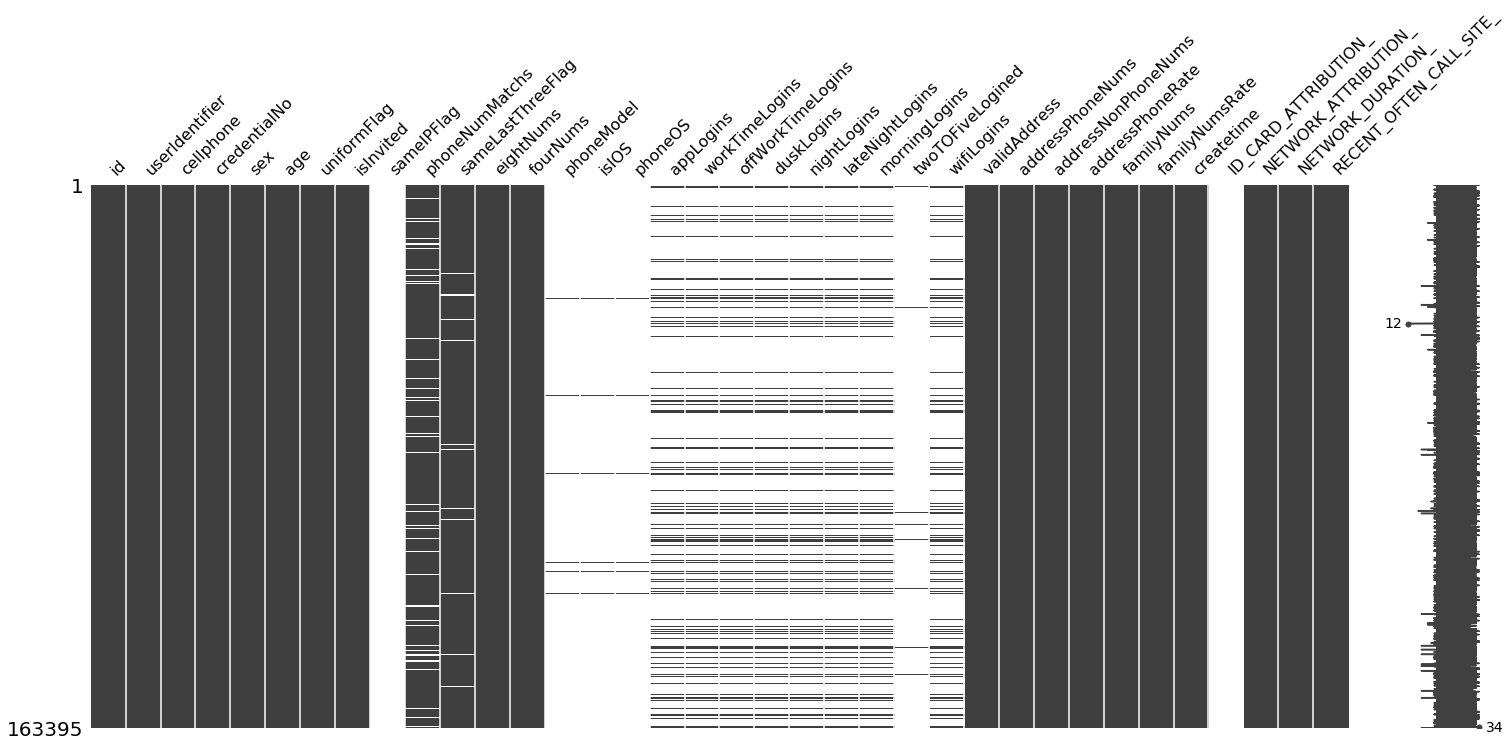

USER_IDENTIFIER_          163385
AVG(DIALING)              163385
AVG(DIALED)               163385
AVG(DIALING_COUNT_)       163385
DIALED_COUNT_             163385
avg_zhujiao               163384
avg_beijiao               163333
avg(TELEPHONE_CHARGE_)    163385
avg(SMS_COUNT_)           163385
yuqi                      163395
first_leadtime            163395
dtype: int64

In [2]:
import pandas as pd
operator_data=pd.read_csv("C:\\Users\\Administrator\\Desktop\\testingData\\operator_data.csv",sep=",",encoding="gbk")
extention=pd.read_csv("C:\\Users\\Administrator\\Desktop\\testingData\\user_extention.csv",sep=",",encoding="gbk")
extention["uniformFlag"]=extention["uniformFlag"].fillna(0)
extention["isInvited"]=extention["isInvited"].fillna(0)
import missingno as missingno
missingno.matrix(extention)
extention=extention.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,25,26,27,28,29,30,31,33,34,35]]
operator_data.count()

In [3]:
#生成衍生变量first_leadhour为生成借款时间点；avg_zhujiao_money为话费/主叫时长
from datetime import datetime
operator_data["first_leadhour"]=operator_data["first_leadtime"].map(lambda x:datetime.strptime(x,"%Y/%m/%d %H:%M:%S").hour)
operator_data["avg_zhujiao_money"]=0
operator_data["avg_zhujiao_money"]=0
operator_data["avg_zhujiao_money"][operator_data["AVG(DIALING)"]!=0]=operator_data["avg(TELEPHONE_CHARGE_)"]/operator_data["AVG(DIALING)"]

F:\anoconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
#两表合并（merge的讲解http://blog.csdn.net/casey_cai/article/details/56834649）
# python中copy为浅拷贝
operator_data["y"]=1
operator_data["y"][operator_data["yuqi"]<15]=0
first_data = pd.merge(extention,operator_data,left_on='userIdentifier',right_on='USER_IDENTIFIER_').drop('userIdentifier',axis=1)
first_data = first_data.drop(['yuqi','first_leadtime','id','cellphone','createtime'],axis=1)
# 这是关于pandas的isnull,isnotnull,dropna,fillna的讲解(http://blog.csdn.net/u010159842/article/details/53673572)
first_data["province_network"] = first_data["NETWORK_ATTRIBUTION_"][pd.notnull(first_data["NETWORK_ATTRIBUTION_"])].map(lambda x:x.split('.')[0])
first_data["province_rencent"] = first_data["RECENT_OFTEN_CALL_SITE_"][pd.notnull(first_data["RECENT_OFTEN_CALL_SITE_"])].map(lambda x:x.split('.')[0])
first_data1 = first_data.drop(pd.isnull(first_data["NETWORK_ATTRIBUTION_"]),axis=0).copy()
first_data1 = first_data1.drop(["NETWORK_ATTRIBUTION_","RECENT_OFTEN_CALL_SITE_"],axis=1)
first_data1

F:\anoconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,credentialNo,sex,age,uniformFlag,isInvited,phoneNumMatchs,sameLastThreeFlag,eightNums,fourNums,validAddress,...,DIALED_COUNT_,avg_zhujiao,avg_beijiao,avg(TELEPHONE_CHARGE_),avg(SMS_COUNT_),first_leadhour,avg_zhujiao_money,y,province_network,province_rencent
1,4.41E+17,1.0,27.0,0.0,1.0,17.0,1.0,1,0,49.0,...,212.0,110.630453,140.281250,17207.87500,779.7500,15,1.024156,0,江苏省,江苏省
2,3.21E+17,0.0,29.0,0.0,0.0,6.0,1.0,0,1,32.0,...,34.0,214.803774,152.779221,10708.10000,256.1000,9,1.881155,0,江苏省,江苏省
3,4.42E+17,1.0,38.0,0.0,0.0,8.0,1.0,1,1,138.0,...,151.0,221.509174,355.845137,13429.37500,34.2500,13,1.112417,0,广东省,广东省
4,1.30E+17,0.0,24.0,1.0,0.0,16.0,1.0,1,0,160.0,...,82.0,47.813528,44.600218,4281.10000,256.6000,15,1.636882,0,河北省,河北省
5,4.33E+17,0.0,38.0,0.0,1.0,23.0,1.0,1,0,909.0,...,457.0,70.224034,62.995393,14251.70000,99.9000,15,0.435507,0,广东省,广东省
6,4.41E+17,1.0,28.0,1.0,1.0,6.0,1.0,0,1,218.0,...,178.0,93.776093,131.209000,13987.00000,133.6667,15,0.782728,0,广东省,广东省
7,43312219890116601X,0.0,28.0,0.0,1.0,17.0,1.0,0,2,145.0,...,261.0,208.509154,116.123821,90243.50000,96.8750,15,3.018682,0,湖南省,湖南省
8,23011919780824018X,1.0,39.0,0.0,0.0,12.0,1.0,2,0,117.0,...,90.0,109.545350,91.770344,16961.80000,12.7000,12,0.894501,0,浙江省,未知
9,1.53E+17,1.0,28.0,0.0,1.0,15.0,1.0,2,2,75.0,...,267.0,106.187324,103.192844,14347.37500,5.1250,8,0.761205,0,内蒙古自治区,内蒙古自治区
10,2.11E+17,0.0,23.0,1.0,1.0,13.0,1.0,2,1,129.0,...,71.0,107.829175,79.911392,35057.62500,15.6250,12,2.496137,0,辽宁省,辽宁省


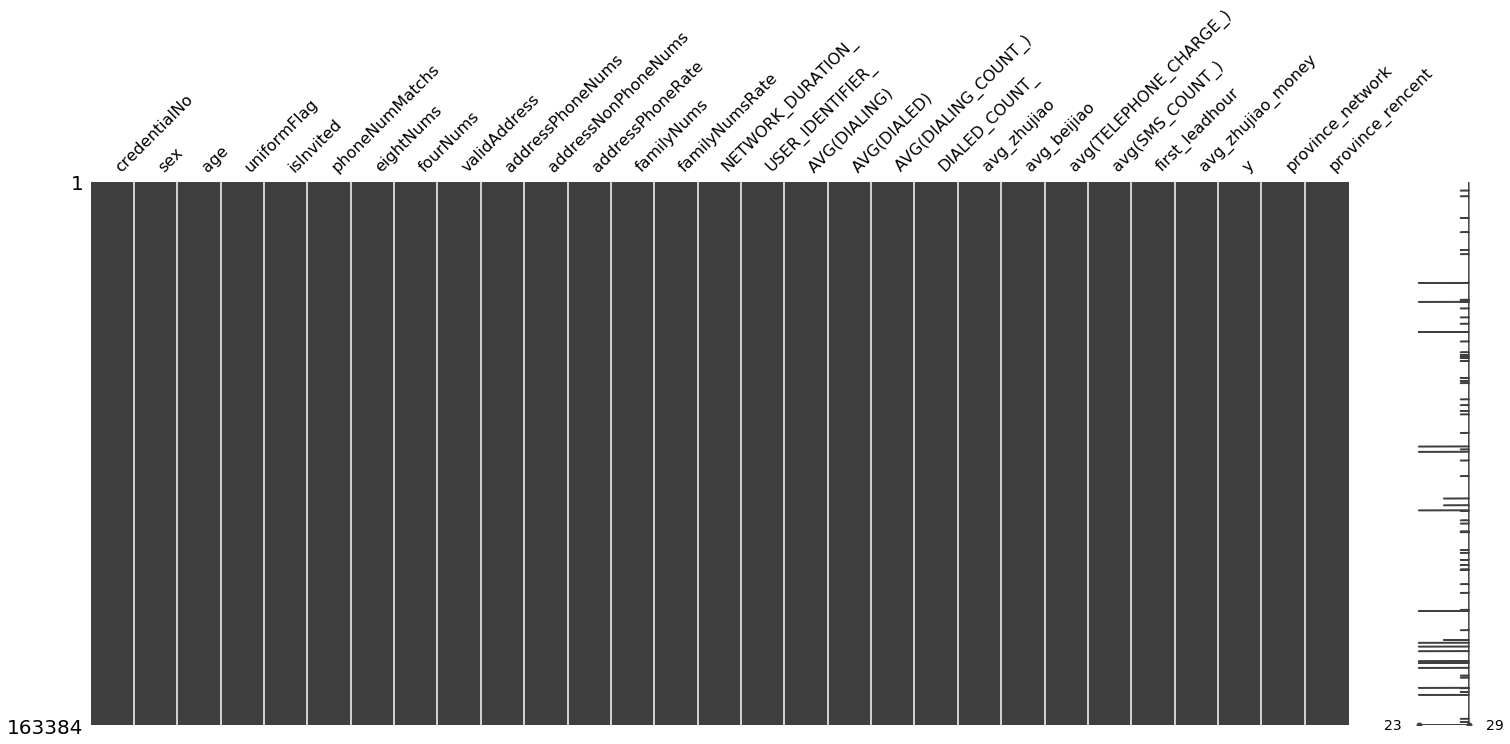

,credentialNo,sex,age,uniformFlag,isInvited,phoneNumMatchs,eightNums,fourNums,validAddress,addressPhoneNums,...,DIALED_COUNT_,avg_zhujiao,avg_beijiao,avg(TELEPHONE_CHARGE_),avg(SMS_COUNT_),first_leadhour,avg_zhujiao_money,y,province_network,province_rencent
1,4.41E+17,1.0,27.0,0.0,1.0,17.0,1,0,49.0,48.0,...,212.0,110.630453,140.281250,17207.87500,779.7500,15,1.024156,0,江苏省,江苏省
2,3.21E+17,0.0,29.0,0.0,0.0,6.0,0,1,32.0,32.0,...,34.0,214.803774,152.779221,10708.10000,256.1000,9,1.881155,0,江苏省,江苏省
3,4.42E+17,1.0,38.0,0.0,0.0,8.0,1,1,138.0,111.0,...,151.0,221.509174,355.845137,13429.37500,34.2500,13,1.112417,0,广东省,广东省
4,1.30E+17,0.0,24.0,1.0,0.0,16.0,1,0,160.0,147.0,...,82.0,47.813528,44.600218,4281.10000,256.6000,15,1.636882,0,河北省,河北省
5,4.33E+17,0.0,38.0,0.0,1.0,23.0,1,0,909.0,826.0,...,457.0,70.224034,62.995393,14251.70000,99.9000,15,0.435507,0,广东省,广东省
6,4.41E+17,1.0,28.0,1.0,1.0,6.0,0,1,218.0,218.0,...,178.0,93.776093,131.209000,13987.00000,133.6667,15,0.782728,0,广东省,广东省
7,43312219890116601X,0.0,28.0,0.0,1.0,17.0,0,2,145.0,128.0,...,261.0,208.509154,116.123821,90243.50000,96.8750,15,3.018682,0,湖南省,湖南省
8,23011919780824018X,1.0,39.0,0.0,0.0,12.0,2,0,117.0,117.0,...,90.0,109.545350,91.770344,16961.80000,12.7000,12,0.894501,0,浙江省,未知
9,1.53E+17,1.0,28.0,0.0,1.0,15.0,2,2,75.0,72.0,...,267.0,106.187324,103.192844,14347.37500,5.1250,8,0.761205,0,内蒙古自治区,内蒙古自治区
10,2.11E+17,0.0,23.0,1.0,1.0,13.0,2,1,129.0,128.0,...,71.0,107.829175,79.911392,35057.62500,15.6250,12,2.496137,0,辽宁省,辽宁省


In [5]:
## 下面对部分缺失值处理，采用均值插补或者众数
#可以看一下这个imputer中的均值插补，怎么算的，注意这边的axis=0标示列而drop中的axis=0标示行
import numpy as np
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=np.nan , strategy='mean', axis=0)
meanMatch = imp.fit(np.array(first_data1["phoneNumMatchs"]).reshape(-1,1))
# imp.statistics_[0]
# np.mean(first_data1["phoneNumMatchs"])
first_data1["phoneNumMatchs"]=first_data1["phoneNumMatchs"].fillna(imp.statistics_[0])
first_data2 = first_data1.drop(["sameLastThreeFlag"],axis=1).copy()
missingno.matrix(first_data2)
first_data2

In [6]:
first_data2["avg(TELEPHONE_CHARGE_)"][first_data2["avg(TELEPHONE_CHARGE_)"]<0]=0
first_data2["avg_zhujiao_money"][first_data2["avg_zhujiao_money"]<0]=0
#删除其余七十条数据
first_data2.dropna(axis=0)

F:\anoconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
F:\anoconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,credentialNo,sex,age,uniformFlag,isInvited,phoneNumMatchs,eightNums,fourNums,validAddress,addressPhoneNums,...,DIALED_COUNT_,avg_zhujiao,avg_beijiao,avg(TELEPHONE_CHARGE_),avg(SMS_COUNT_),first_leadhour,avg_zhujiao_money,y,province_network,province_rencent
1,4.41E+17,1.0,27.0,0.0,1.0,17.0,1,0,49.0,48.0,...,212.0,110.630453,140.281250,17207.87500,779.7500,15,1.024156,0,江苏省,江苏省
2,3.21E+17,0.0,29.0,0.0,0.0,6.0,0,1,32.0,32.0,...,34.0,214.803774,152.779221,10708.10000,256.1000,9,1.881155,0,江苏省,江苏省
3,4.42E+17,1.0,38.0,0.0,0.0,8.0,1,1,138.0,111.0,...,151.0,221.509174,355.845137,13429.37500,34.2500,13,1.112417,0,广东省,广东省
4,1.30E+17,0.0,24.0,1.0,0.0,16.0,1,0,160.0,147.0,...,82.0,47.813528,44.600218,4281.10000,256.6000,15,1.636882,0,河北省,河北省
5,4.33E+17,0.0,38.0,0.0,1.0,23.0,1,0,909.0,826.0,...,457.0,70.224034,62.995393,14251.70000,99.9000,15,0.435507,0,广东省,广东省
6,4.41E+17,1.0,28.0,1.0,1.0,6.0,0,1,218.0,218.0,...,178.0,93.776093,131.209000,13987.00000,133.6667,15,0.782728,0,广东省,广东省
7,43312219890116601X,0.0,28.0,0.0,1.0,17.0,0,2,145.0,128.0,...,261.0,208.509154,116.123821,90243.50000,96.8750,15,3.018682,0,湖南省,湖南省
8,23011919780824018X,1.0,39.0,0.0,0.0,12.0,2,0,117.0,117.0,...,90.0,109.545350,91.770344,16961.80000,12.7000,12,0.894501,0,浙江省,未知
9,1.53E+17,1.0,28.0,0.0,1.0,15.0,2,2,75.0,72.0,...,267.0,106.187324,103.192844,14347.37500,5.1250,8,0.761205,0,内蒙古自治区,内蒙古自治区
10,2.11E+17,0.0,23.0,1.0,1.0,13.0,2,1,129.0,128.0,...,71.0,107.829175,79.911392,35057.62500,15.6250,12,2.496137,0,辽宁省,辽宁省


In [7]:
zhima=pd.read_csv("C:\\Users\\Administrator\\Desktop\\testingData\\zhima.csv",sep=",",encoding="gbk")
zhima=zhima[["USER_IDENTIFIER_","zhima"]]
final_data = zhima.merge(first_data2,on="USER_IDENTIFIER_")
# print(final_data.info())
final_data.columns

Index(['USER_IDENTIFIER_', 'zhima', 'credentialNo', 'sex', 'age',
       'uniformFlag', 'isInvited', 'phoneNumMatchs', 'eightNums', 'fourNums',
       'validAddress', 'addressPhoneNums', 'addressNonPhoneNums',
       'addressPhoneRate', 'familyNums', 'familyNumsRate', 'NETWORK_DURATION_',
       'AVG(DIALING)', 'AVG(DIALED)', 'AVG(DIALING_COUNT_)', 'DIALED_COUNT_',
       'avg_zhujiao', 'avg_beijiao', 'avg(TELEPHONE_CHARGE_)',
       'avg(SMS_COUNT_)', 'first_leadhour', 'avg_zhujiao_money', 'y',
       'province_network', 'province_rencent'],
      dtype='object')

## 以上都是数据处理部分，以下开始模型搭建
### 到这里 你如果是个初学者 就开始迷茫了。为什么要分组求IV值讲解（http://blog.csdn.net/kevin7658/article/details/50780391）

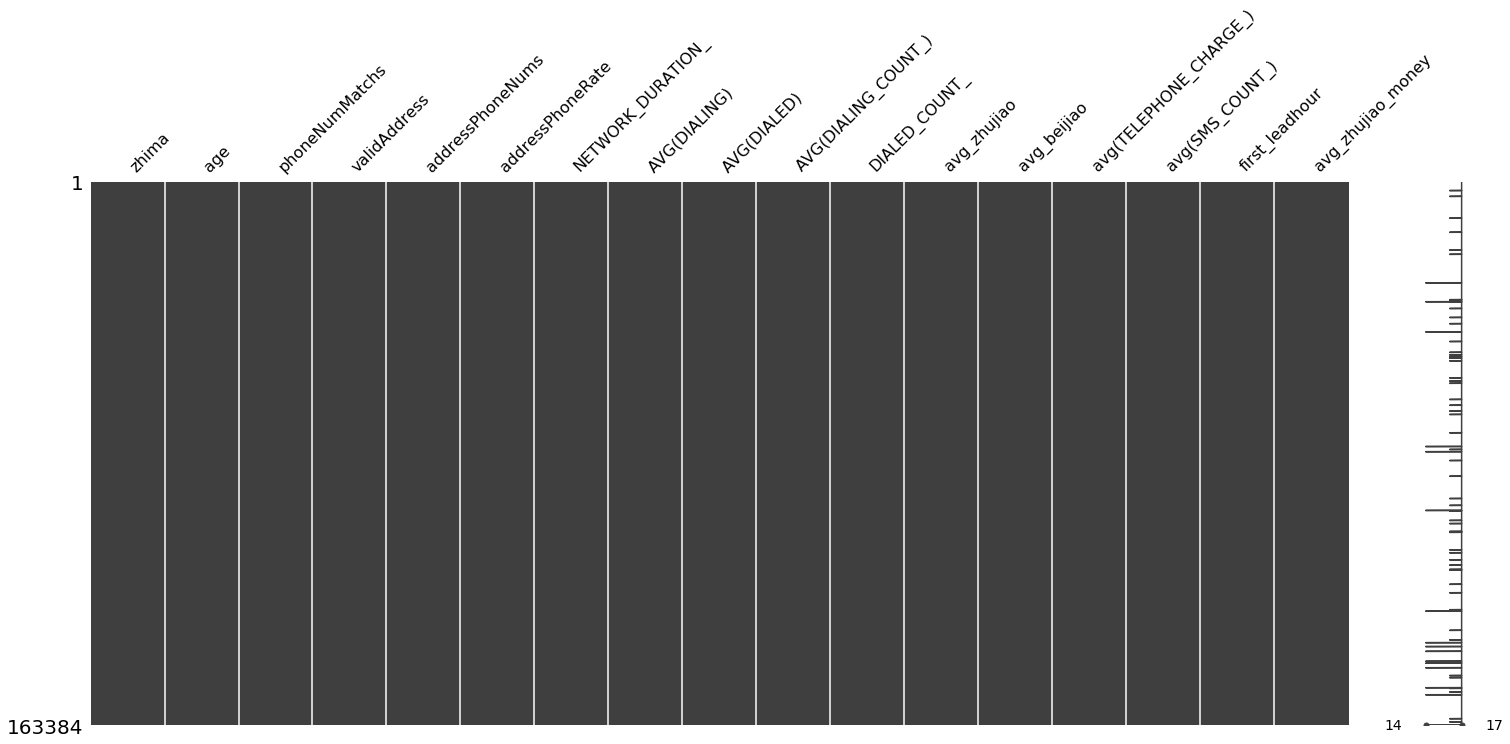

In [9]:
plot_data = final_data.drop(["USER_IDENTIFIER_","credentialNo","sex","uniformFlag","isInvited","eightNums","fourNums","addressNonPhoneNums","familyNums","familyNumsRate","province_network","province_rencent","y"],axis=1)
plot_data["zhima"]
missingno.matrix(plot_data)

## 寻找好的分组

In [18]:
for i in plot_data.columns:
    IV_i=[]
    for j in range(1,12):
        print(j)
    print(plot_data[i])


1
2
3
4
5
6
7
8
9
10
11
0         663
1         604
2         673
3         625
4         606
5         611
6         669
7         738
8         661
9         676
10        644
11        611
12        657
13        603
14        675
15        614
16        627
17        647
18        610
19        634
20        602
21        622
22        614
23        657
24        639
25        612
26        618
27        649
28        717
29        636
         ... 
163354    641
163355    642
163356    647
163357    603
163358    633
163359    605
163360    610
163361    713
163362    680
163363    653
163364    610
163365    688
163366    661
163367    632
163368    562
163369    649
163370    634
163371    599
163372    586
163373    602
163374    613
163375    611
163376    664
163377    633
163378    609
163379    697
163380    571
163381    634
163382    602
163383    656
Name: zhima, Length: 163384, dtype: int64
1
2
3
4
5
6
7
8
9
10
11
0         27.0
1         29.0
2         38.0
3         2

## 下面这段代码和以上以下都无关，插播一个例子，用于对IV和woe不懂的人看，这是一个求woe值和IV值得过程，主要对一组X值和一组Y值整合求IV，最终求IV的和 来判定这个特征对Y的作用到底有多大。IV的和大于0.2为比较有明显作用。

In [140]:
from pandas import Series,DataFrame
import numpy as np
x = DataFrame([1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2],index = range(20),columns=['x'])
x['index']=x.index
y = DataFrame([0,1,1,1,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,1],index = range(20),columns=['y'])
y['index']=y.index
croXY = pd.merge(x,y).drop(['index'],axis=1)
per = np.array(list(range(5)))
per =per*100/4*1.0
per[4]=100
res = np.percentile(croXY['x'],q=per)
res[4]=np.inf
res[0]=-np.inf
res
X = pd.cut(croXY['x'],res)
X
py1=[]
py0=[]
table = pd.crosstab(croXY['x'],croXY['y'])
print(table)
for k in list(range(len(table))):
    py1 = py1+[table.iloc[k,1]/sum(table[1])]
    py0 = py0+[table.iloc[k,0]/sum(table[0])]
py1 = Series(py1,index= table.index)
py0 = Series(py0,index= table.index)
woe=np.log(py1/py0)
IV=(py1-py0)*woe
IV
result = pd.concat([table,py1,py0,woe,IV],axis=1)
result.columns =['0','1','py1','py0','woe','IV']
result
IVsum = sum(result['IV'])
result
# crosstab的讲解（http://blog.csdn.net/alanguoo/article/details/52330404 ）
#（IV和woe讲解）


y  0  1
x      
1  5  2
2  1  6
3  2  4


,0,1,py1,py0,woe,IV
x,,,,,,
1,5,2,0.166667,0.625,-1.321756,0.605805
2,1,6,0.500000,0.125,1.386294,0.519860
3,2,4,0.333333,0.250,0.287682,0.023974


[1, 2]